In [ ]:
!pip install GEOparse


In [ ]:
!pip install GEOparse


In [ ]:
from GEOparse import get_GEO
gse = get_GEO("GSE98793")


03-Dec-2025 18:49:27 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
03-Dec-2025 18:49:27 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE98nnn/GSE98793/soft/GSE98793_family.soft.gz to ./GSE98793_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE98nnn/GSE98793/soft/GSE98793_family.soft.gz to ./GSE98793_family.soft.gz
100%|██████████| 104M/104M [00:01<00:00, 59.3MB/s] 
03-Dec-2025 18:49:30 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
03-Dec-2025 18:49:30 DEBUG downloader - Moving /tmp/tmpo56zzaug to /content/GSE98793_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmpo56zzaug to /content/GSE98793_family.soft.gz
03-Dec-2025 18:49:30 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE98nnn/GSE98793/soft/GSE98793_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE98nnn/GSE987

In [ ]:
import pandas as pd

meta_rows = []
for gsm_name, gsm in gse.gsms.items():
    md = gsm.metadata
    meta_rows.append({
        "sample": gsm_name,
        "sex": md.get("gender:ch1", [""])[0] if "gender:ch1" in md else "",
        "diagnosis": md.get("phenotype:ch1", [""])[0] if "phenotype:ch1" in md else ""
    })
meta = pd.DataFrame(meta_rows).set_index("sample")
meta.head()


,sex,diagnosis
sample,,
GSM2612096,,
GSM2612097,,
GSM2612098,,
GSM2612099,,
GSM2612100,,


In [ ]:
gsm_name, gsm = next(iter(gse.gsms.items()))
gsm.metadata.keys()


dict_keys(['title', 'geo_accession', 'status', 'submission_date', 'last_update_date', 'type', 'channel_count', 'source_name_ch1', 'organism_ch1', 'taxid_ch1', 'characteristics_ch1', 'molecule_ch1', 'extract_protocol_ch1', 'label_ch1', 'label_protocol_ch1', 'hyb_protocol', 'scan_protocol', 'description', 'data_processing', 'platform_id', 'contact_name', 'contact_email', 'contact_laboratory', 'contact_department', 'contact_institute', 'contact_address', 'contact_city', 'contact_zip/postal_code', 'contact_country', 'supplementary_file', 'series_id', 'data_row_count'])

In [ ]:
gsm.metadata


{'title': ['whole_blood_control_1'],
 'geo_accession': ['GSM2612096'],
 'status': ['Public on May 12 2017'],
 'submission_date': ['May 11 2017'],
 'last_update_date': ['Jan 23 2018'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['whole_blood_control'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['subject group: CNTL; healthy control',
  'anxiety: no',
  'gender: M',
  'age: 35.8',
  'tissue: whole blood',
  'batch: 1'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['RNA was isolated from all samples using the standard PAXgene protocol on the Qiagen Biorobot 8000.'],
 'label_ch1': ['biotin'],
 'label_protocol_ch1': ['standard Affymetrix protocol'],
 'hyb_protocol': ['standard Affymetrix protocol'],
 'scan_protocol': ['Arrays were scanned on a GeneChip Scanner 3000 and fluorescence intensity for each feature of the array was obtained by using GeneChip® Operating Software (Affymetrix, Santa Clara, CA, USA).  Arrays wer

In [ ]:
gsm_name, gsm = next(iter(gse.gsms.items()))
gsm.metadata.keys()


dict_keys(['title', 'geo_accession', 'status', 'submission_date', 'last_update_date', 'type', 'channel_count', 'source_name_ch1', 'organism_ch1', 'taxid_ch1', 'characteristics_ch1', 'molecule_ch1', 'extract_protocol_ch1', 'label_ch1', 'label_protocol_ch1', 'hyb_protocol', 'scan_protocol', 'description', 'data_processing', 'platform_id', 'contact_name', 'contact_email', 'contact_laboratory', 'contact_department', 'contact_institute', 'contact_address', 'contact_city', 'contact_zip/postal_code', 'contact_country', 'supplementary_file', 'series_id', 'data_row_count'])

In [ ]:
for k, v in gsm.metadata.items():
    print(k, ":", v)


title : ['whole_blood_control_1']
geo_accession : ['GSM2612096']
status : ['Public on May 12 2017']
submission_date : ['May 11 2017']
last_update_date : ['Jan 23 2018']
type : ['RNA']
channel_count : ['1']
source_name_ch1 : ['whole_blood_control']
organism_ch1 : ['Homo sapiens']
taxid_ch1 : ['9606']
characteristics_ch1 : ['subject group: CNTL; healthy control', 'anxiety: no', 'gender: M', 'age: 35.8', 'tissue: whole blood', 'batch: 1']
molecule_ch1 : ['total RNA']
extract_protocol_ch1 : ['RNA was isolated from all samples using the standard PAXgene protocol on the Qiagen Biorobot 8000.']
label_ch1 : ['biotin']
label_protocol_ch1 : ['standard Affymetrix protocol']
hyb_protocol : ['standard Affymetrix protocol']
scan_protocol : ['Arrays were scanned on a GeneChip Scanner 3000 and fluorescence intensity for each feature of the array was obtained by using GeneChip® Operating Software (Affymetrix, Santa Clara, CA, USA).  Arrays were scanned on a GeneChip Scanner 3000 and fluorescence intens

In [ ]:
import pandas as pd

def get_char(md, key_substring):
    """
    Look in characteristics_ch1 entries and return the text after 'key:'.
    Example: key_substring='gender' → 'M'
             key_substring='subject group' → 'CNTL'
    """
    for item in md.get("characteristics_ch1", []):
        low = item.lower()
        if key_substring in low:
            # split at the first ':' and then cut off at the first ';'
            parts = item.split(":", 1)
            if len(parts) == 2:
                after_colon = parts[1]
                # sometimes there's ';' after value
                val = after_colon.split(";")[0].strip()
                return val
    return ""


In [ ]:
meta_rows = []
for gsm_name, gsm in gse.gsms.items():
    md = gsm.metadata
    meta_rows.append({
        "sample": gsm_name,
        "sex": get_char(md, "gender"),
        "diagnosis": get_char(md, "subject group"),
    })

meta = pd.DataFrame(meta_rows).set_index("sample")
meta.head()


,sex,diagnosis
sample,,
GSM2612096,M,CNTL
GSM2612097,F,CNTL
GSM2612098,F,CNTL
GSM2612099,F,CNTL
GSM2612100,M,CNTL


In [ ]:
# normalize sex
meta["sex"] = meta["sex"].str.upper().str.strip()
meta["sex"] = meta["sex"].map({"M": "male", "F": "female"}).fillna(meta["sex"])

# normalize diagnosis
meta["diagnosis"] = meta["diagnosis"].str.upper().str.strip()
meta["diagnosis"] = meta["diagnosis"].map({"CNTL": "control", "MDD": "mdd"}).fillna(meta["diagnosis"])

print(meta["sex"].value_counts())
print(meta["diagnosis"].value_counts())
print(pd.crosstab(meta["sex"], meta["diagnosis"]))


sex
female    144
male       48
Name: count, dtype: int64
diagnosis
CASE       128
control     64
Name: count, dtype: int64
diagnosis  CASE  control
sex                     
female       96       48
male         32       16


In [ ]:
meta["diagnosis"] = meta["diagnosis"].str.upper().str.strip()
meta["diagnosis"] = meta["diagnosis"].replace({
    "CASE": "mdd",
    "MDD": "mdd",
    "CNTL": "control",
    "CONTROL": "control"
})


In [ ]:
print(meta["diagnosis"].value_counts())
print(pd.crosstab(meta["sex"], meta["diagnosis"]))



diagnosis
mdd        128
control     64
Name: count, dtype: int64
diagnosis  control  mdd
sex                    
female          48   96
male            16   32


In [ ]:
# extract expression table
expr = gse.pivot_samples("VALUE").astype(float)

expr = expr.T  # transpose so rows = samples, columns = probes/genes

print(expr.shape)
expr.head()


(192, 54675)


ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
name,,,,,,,,,,,,,,,,,,,,,
GSM2612096,5.850755,7.092003,9.373934,5.814709,2.728267,7.759279,5.471557,4.789368,9.237893,3.525548,...,2.962237,10.971878,11.232722,11.314003,11.575086,11.514398,13.123345,12.936158,14.189331,13.991847
GSM2612097,5.577231,6.618856,9.315652,5.643282,2.671652,7.580082,5.946168,4.803316,8.791764,3.406293,...,3.414959,11.029518,11.204662,11.312054,11.514805,11.714836,13.098973,13.105714,14.201549,14.074253
GSM2612098,5.663056,6.487570,8.237757,5.363979,2.206741,7.040423,5.739707,4.612934,9.519764,3.181881,...,2.992093,10.826100,11.067723,11.182784,11.353895,11.351371,13.459877,13.078201,14.245318,14.131001
GSM2612099,5.596154,6.565388,8.877479,5.340978,2.998085,7.311486,5.828200,4.702126,9.410308,3.522420,...,2.741359,10.836074,11.034449,11.325967,11.398418,11.414534,13.358833,13.026978,14.245318,14.085953
GSM2612100,5.242699,6.531346,8.148008,5.701092,2.594565,6.879163,5.675944,4.979393,9.019369,3.645697,...,3.556644,10.903756,11.029261,11.253544,11.467698,11.487514,13.226250,12.878946,14.224319,14.002432


In [ ]:
print(expr.shape)


(192, 54675)


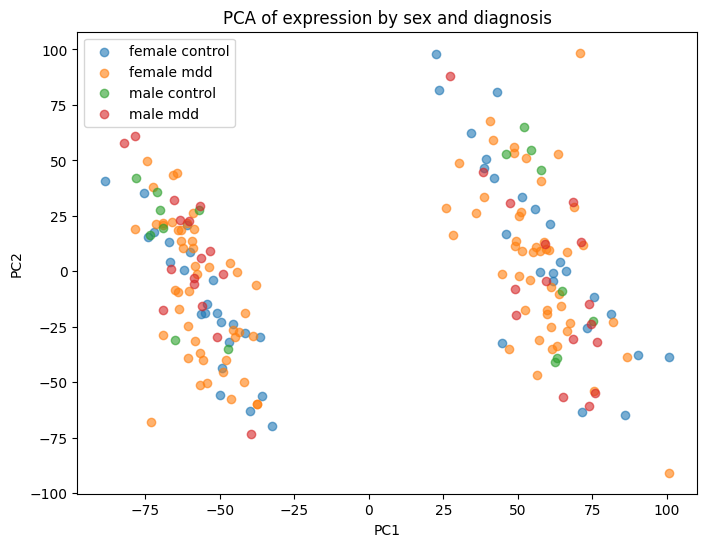

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Match ordering of rows between expr and metadata
expr_use = expr.loc[meta.index]

# Run PCA
pca = PCA(n_components=2)
pca_res = pca.fit_transform(expr_use)

meta["PC1"] = pca_res[:,0]
meta["PC2"] = pca_res[:,1]

# Color by BOTH sex & diagnosis
plt.figure(figsize=(8,6))
for sex in ["female", "male"]:
    for dx in ["control", "mdd"]:
        subset = meta[(meta["sex"] == sex) & (meta["diagnosis"] == dx)]
        plt.scatter(subset["PC1"], subset["PC2"], label=f"{sex} {dx}", alpha=0.6)

plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of expression by sex and diagnosis")
plt.show()


In [ ]:
female_mdd = meta[(meta["sex"] == "female") & (meta["diagnosis"] == "mdd")].index
female_ctrl = meta[(meta["sex"] == "female") & (meta["diagnosis"] == "control")].index

female_fc = expr.loc[female_mdd].mean() - expr.loc[female_ctrl].mean()
female_fc = female_fc.sort_values(ascending=False)

print("Top genes higher in FEMALE MDD:")
print(female_fc.head(15))

print("\nTop genes lower in FEMALE MDD:")
print(female_fc.tail(15))


Top genes higher in FEMALE MDD:
ID_REF
212768_s_at    1.195069
206676_at      0.776027
231688_at      0.725805
202018_s_at    0.680788
212531_at      0.659145
206371_at      0.645530
207269_at      0.598551
209728_at      0.598020
237023_at      0.566050
206177_s_at    0.556985
215652_at      0.554802
205557_at      0.524392
223796_at      0.506467
228285_at      0.502962
211657_at      0.502521
dtype: float64

Top genes lower in FEMALE MDD:
ID_REF
211734_s_at   -0.379780
206666_at     -0.385015
217295_at     -0.388456
209686_at     -0.389778
214602_at     -0.392884
235743_at     -0.394633
237208_at     -0.402503
210288_at     -0.409924
236203_at     -0.425794
235104_at     -0.467334
238968_at     -0.471601
212999_x_at   -0.515447
227194_at     -0.620990
209480_at     -0.755333
213831_at     -1.075102
dtype: float64


In [ ]:
gpl_id = list(gse.gpls.keys())[0]   # usually only one platform
gpl = gse.gpls[gpl_id]
annot = gpl.table


In [ ]:
annot.columns


Index(['ID', 'GB_ACC', 'SPOT_ID', 'Species Scientific Name', 'Annotation Date',
       'Sequence Type', 'Sequence Source', 'Target Description',
       'Representative Public ID', 'Gene Title', 'Gene Symbol',
       'ENTREZ_GENE_ID', 'RefSeq Transcript ID',
       'Gene Ontology Biological Process', 'Gene Ontology Cellular Component',
       'Gene Ontology Molecular Function'],
      dtype='object')

In [ ]:
probe2gene = annot[['ID', 'Gene Symbol']].set_index('ID')


In [ ]:
female_fc_genes = female_fc.to_frame(name="FC").join(probe2gene, how="left")
female_fc_genes.head(20)


,FC,Gene Symbol
ID_REF,,
212768_s_at,1.195069,OLFM4
206676_at,0.776027,CEACAM8
231688_at,0.725805,MMP8
202018_s_at,0.680788,LTF
212531_at,0.659145,LCN2
206371_at,0.645530,FOLR3
207269_at,0.598551,DEFA4
209728_at,0.598020,HLA-DRB4
237023_at,0.566050,NaN


In [ ]:
gpl_id = list(gse.gpls.keys())[0]
gpl = gse.gpls[gpl_id]
annot = gpl.table

annot.columns


Index(['ID', 'GB_ACC', 'SPOT_ID', 'Species Scientific Name', 'Annotation Date',
       'Sequence Type', 'Sequence Source', 'Target Description',
       'Representative Public ID', 'Gene Title', 'Gene Symbol',
       'ENTREZ_GENE_ID', 'RefSeq Transcript ID',
       'Gene Ontology Biological Process', 'Gene Ontology Cellular Component',
       'Gene Ontology Molecular Function'],
      dtype='object')

In [ ]:
male_mdd = meta[(meta["sex"] == "male") & (meta["diagnosis"] == "mdd")].index
male_ctrl = meta[(meta["sex"] == "male") & (meta["diagnosis"] == "control")].index

print("Male MDD sample count:", len(male_mdd))
print("Male control sample count:", len(male_ctrl))


Male MDD sample count: 32
Male control sample count: 16


In [ ]:
male_fc = expr.loc[male_mdd].mean() - expr.loc[male_ctrl].mean()
male_fc = male_fc.sort_values(ascending=False)

print("Top genes higher in MALE MDD:")
print(male_fc.head(15))

print("\nTop genes lower in MALE MDD:")
print(male_fc.tail(15))


Top genes higher in MALE MDD:
ID_REF
219669_at      0.933528
212531_at      0.904785
206177_s_at    0.885169
220532_s_at    0.882840
207269_at      0.870210
239591_at      0.831496
207329_at      0.824655
207802_at      0.822447
231688_at      0.817188
203757_s_at    0.780410
206697_s_at    0.770717
235818_at      0.755158
211657_at      0.747070
206676_at      0.746947
202018_s_at    0.736185
dtype: float64

Top genes lower in MALE MDD:
ID_REF
230569_at     -0.682161
205826_at     -0.683418
240572_s_at   -0.690866
238478_at     -0.702823
1553177_at    -0.709679
220646_s_at   -0.737398
211748_x_at   -0.738919
212187_x_at   -0.747101
219304_s_at   -0.753447
237145_at     -0.811662
233036_at     -0.868104
207509_s_at   -0.955991
213920_at     -0.983855
209160_at     -1.010471
213831_at     -1.076372
dtype: float64


In [ ]:
male_fc_genes = male_fc.to_frame(name="FC").join(probe2gene, how="left")
male_fc_genes.head(20)


,FC,Gene Symbol
ID_REF,,
219669_at,0.933528,CD177
212531_at,0.904785,LCN2
206177_s_at,0.885169,ARG1
220532_s_at,0.882840,TMEM176B
207269_at,0.870210,DEFA4
239591_at,0.831496,NaN
207329_at,0.824655,MMP8
207802_at,0.822447,CRISP3
231688_at,0.817188,MMP8


In [ ]:
print("Top decreased genes in MALE MDD:")
print(male_fc_genes.tail(15)[["FC","Gene Symbol"]])


Top decreased genes in MALE MDD:
                   FC                Gene Symbol
ID_REF                                          
230569_at   -0.682161                   KIAA1430
205826_at   -0.683418                      MYOM2
240572_s_at -0.690866                  LOC374443
238478_at   -0.702823                       BNC2
1553177_at  -0.709679                     SH2D1B
220646_s_at -0.737398                      KLRF1
211748_x_at -0.738919                      PTGDS
212187_x_at -0.747101                      PTGDS
219304_s_at -0.753447                      PDGFD
237145_at   -0.811662                    EIF2AK4
233036_at   -0.868104                        NaN
207509_s_at -0.955991                      LAIR2
213920_at   -0.983855                       CUX2
209160_at   -1.010471                     AKR1C3
213831_at   -1.076372  HLA-DQA1 /// LOC100509457


In [ ]:
female_fc_genes.to_csv("female_MDD_genes.csv")
male_fc_genes.to_csv("male_MDD_genes.csv")


In [ ]:
male_fc_genes = male_fc.to_frame(name="FC").join(probe2gene, how="left")
male_fc_genes.head(20)


,FC,Gene Symbol
ID_REF,,
219669_at,0.933528,CD177
212531_at,0.904785,LCN2
206177_s_at,0.885169,ARG1
220532_s_at,0.882840,TMEM176B
207269_at,0.870210,DEFA4
239591_at,0.831496,NaN
207329_at,0.824655,MMP8
207802_at,0.822447,CRISP3
231688_at,0.817188,MMP8


In [ ]:
top_male_up = male_fc_genes.sort_values("FC", ascending=False).head(15)
top_male_up


,FC,Gene Symbol
ID_REF,,
219669_at,0.933528,CD177
212531_at,0.904785,LCN2
206177_s_at,0.885169,ARG1
220532_s_at,0.882840,TMEM176B
207269_at,0.870210,DEFA4
239591_at,0.831496,NaN
207329_at,0.824655,MMP8
207802_at,0.822447,CRISP3
231688_at,0.817188,MMP8


In [ ]:
top_male_down = male_fc_genes.sort_values("FC", ascending=True).head(15)
top_male_down


,FC,Gene Symbol
ID_REF,,
213831_at,-1.076372,HLA-DQA1 /// LOC100509457
209160_at,-1.010471,AKR1C3
213920_at,-0.983855,CUX2
207509_s_at,-0.955991,LAIR2
233036_at,-0.868104,NaN
237145_at,-0.811662,EIF2AK4
219304_s_at,-0.753447,PDGFD
212187_x_at,-0.747101,PTGDS
211748_x_at,-0.738919,PTGDS


In [ ]:
def de_stats(group1_idx, group2_idx, label1="MDD", label2="Control"):
    x1 = expr.loc[group1_idx]  # e.g., MDD
    x2 = expr.loc[group2_idx]  # e.g., Control

    # log2-ish fold change: mean(group1) - mean(group2)
    logfc = x1.mean(axis=0) - x2.mean(axis=0)

    # Welch t-test per probe
    t, p = stats.ttest_ind(x1, x2, axis=0, equal_var=False, nan_policy="omit")
    p = pd.Series(p, index=logfc.index)

    df = pd.DataFrame({"logFC": logfc, "pval": p})
    df["neglog10_p"] = -np.log10(df["pval"].replace(0, np.nan))
    return df


In [ ]:
expr = expr.loc[meta.index]


In [ ]:
from scipy import stats
import numpy as np


In [ ]:
female_de = de_stats(female_mdd, female_ctrl, "Female MDD", "Female Control")
female_de = female_de.join(probe2gene, how="left")
female_de.head()


,logFC,pval,neglog10_p,Gene Symbol
ID_REF,,,,
1007_s_at,-0.043108,0.574100,0.241012,DDR1 /// MIR4640
1053_at,0.112221,0.261214,0.583004,RFC2
117_at,0.094798,0.462155,0.335212,HSPA6
121_at,0.005565,0.894807,0.048270,PAX8
1255_g_at,-0.020066,0.665846,0.176626,GUCA1A


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
# Make sure expr rows match meta
expr = expr.loc[meta.index]

# groups (if you need to re-make them)
female_mdd = meta[(meta["sex"]=="female") & (meta["diagnosis"]=="mdd")].index
female_ctrl = meta[(meta["sex"]=="female") & (meta["diagnosis"]=="control")].index
male_mdd   = meta[(meta["sex"]=="male")   & (meta["diagnosis"]=="mdd")].index
male_ctrl  = meta[(meta["sex"]=="male")   & (meta["diagnosis"]=="control")].index


In [ ]:
def de_stats(group1_idx, group2_idx):
    """
    Simple DE: group1 vs group2
    Returns logFC, p-value, -log10(p)
    """
    x1 = expr.loc[group1_idx]   # e.g. MDD
    x2 = expr.loc[group2_idx]   # e.g. control

    logfc = x1.mean(axis=0) - x2.mean(axis=0)

    t, p = stats.ttest_ind(x1, x2, axis=0, equal_var=False, nan_policy="omit")
    p = pd.Series(p, index=logfc.index)

    df = pd.DataFrame({
        "logFC": logfc,
        "pval": p
    })
    df["neglog10_p"] = -np.log10(df["pval"].replace(0, np.nan))
    return df


In [ ]:
female_de = de_stats(female_mdd, female_ctrl)
female_de = female_de.join(probe2gene, how="left")

male_de = de_stats(male_mdd, male_ctrl)
male_de = male_de.join(probe2gene, how="left")


In [ ]:
def volcano_plot(de_df, title):
    plt.figure(figsize=(7,6))
    plt.scatter(de_df["logFC"], de_df["neglog10_p"], s=6, alpha=0.4)

    # threshold lines (optional)
    plt.axvline( 0.5, linestyle="--")
    plt.axvline(-0.5, linestyle="--")
    plt.axhline(-np.log10(0.05), linestyle="--")

    plt.xlabel("log2 fold-change (MDD − Control)")
    plt.ylabel("−log10 p-value")
    plt.title(title)
    plt.tight_layout()
    plt.show()


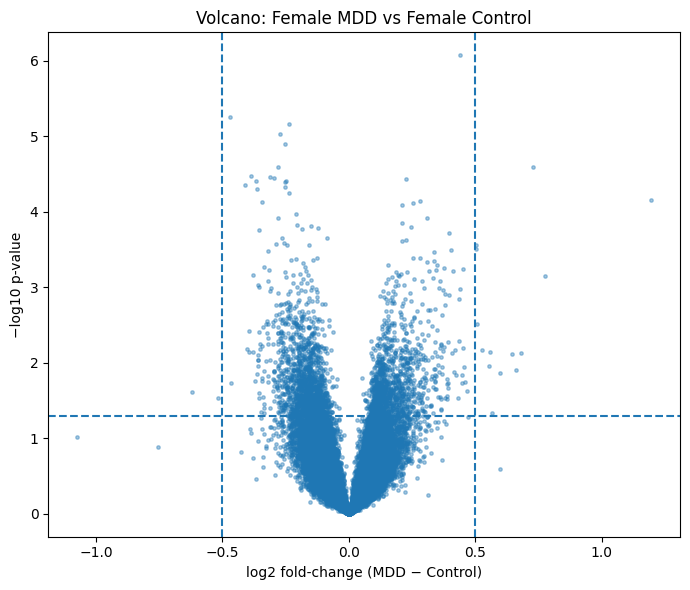

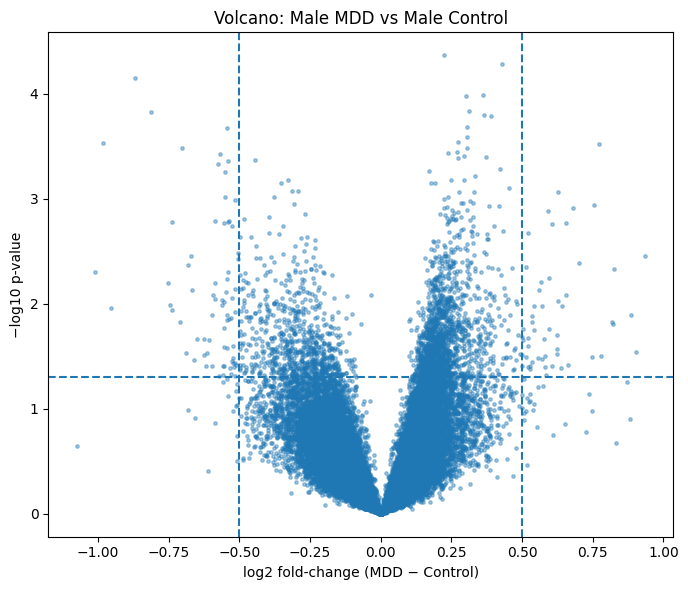

In [ ]:
volcano_plot(female_de, "Volcano: Female MDD vs Female Control")
volcano_plot(male_de,   "Volcano: Male MDD vs Male Control")


In [ ]:
def volcano_plot(de_df, title, filename):
    plt.figure(figsize=(7,6))
    plt.scatter(de_df["logFC"], de_df["neglog10_p"], s=6, alpha=0.4)

    plt.axvline(0.5, linestyle="--")
    plt.axvline(-0.5, linestyle="--")
    plt.axhline(-np.log10(0.05), linestyle="--")

    plt.xlabel("log2 fold-change (MDD − Control)")
    plt.ylabel("−log10 p-value")
    plt.title(title)
    plt.tight_layout()

    plt.savefig(filename, dpi=300)   # ← SAVE HERE!
    plt.show()


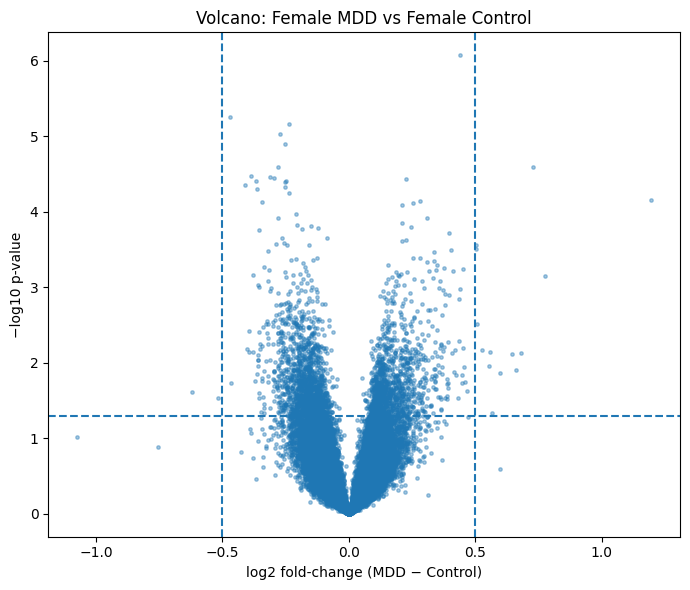

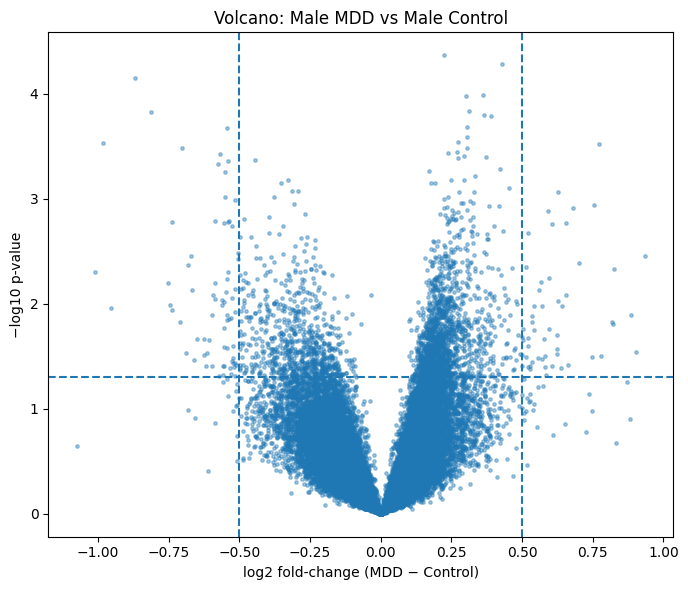

In [ ]:
volcano_plot(female_de, "Volcano: Female MDD vs Female Control", "female_volcano.png")
volcano_plot(male_de,   "Volcano: Male MDD vs Male Control",   "male_volcano.png")


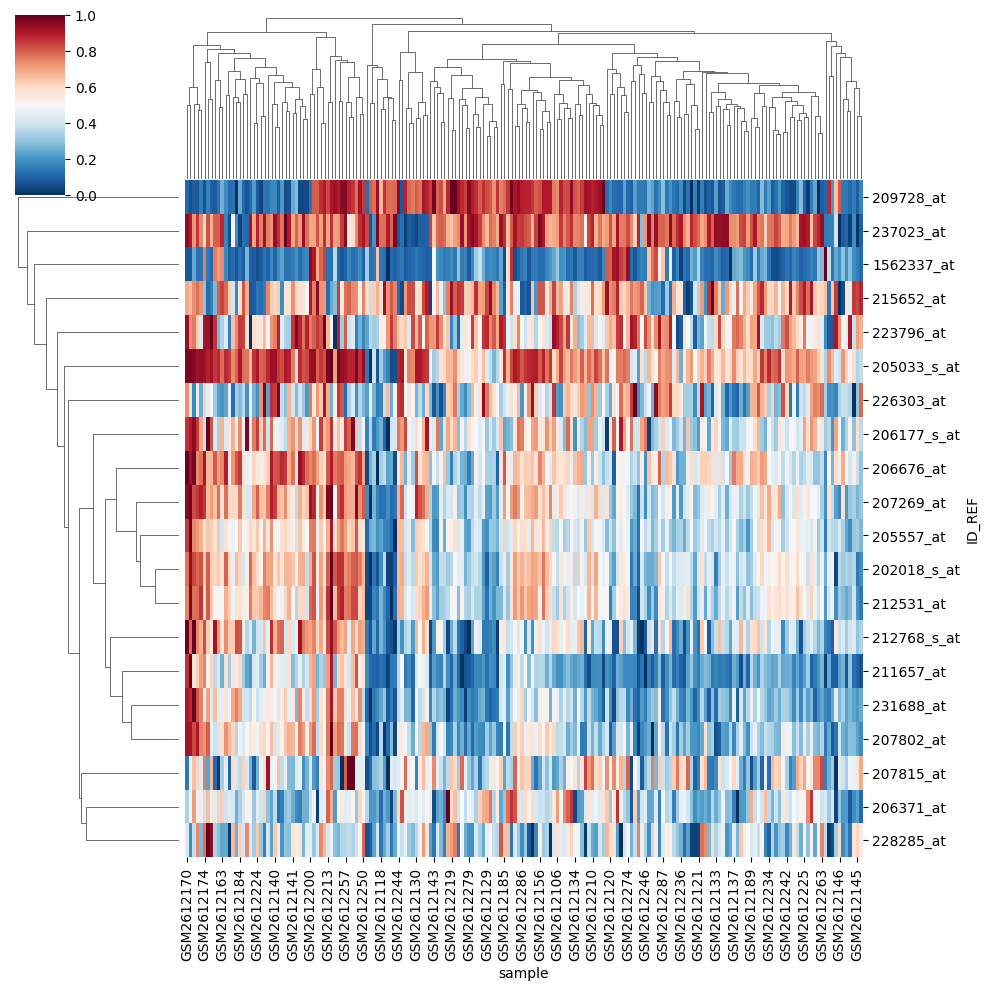

In [ ]:
import seaborn as sns

genes_female = female_fc.head(20).index
heat_female = expr[genes_female]

sns.clustermap(heat_female.T, cmap="RdBu_r", standard_scale=0)
plt.savefig("heatmap_female.png", dpi=300)
plt.show()


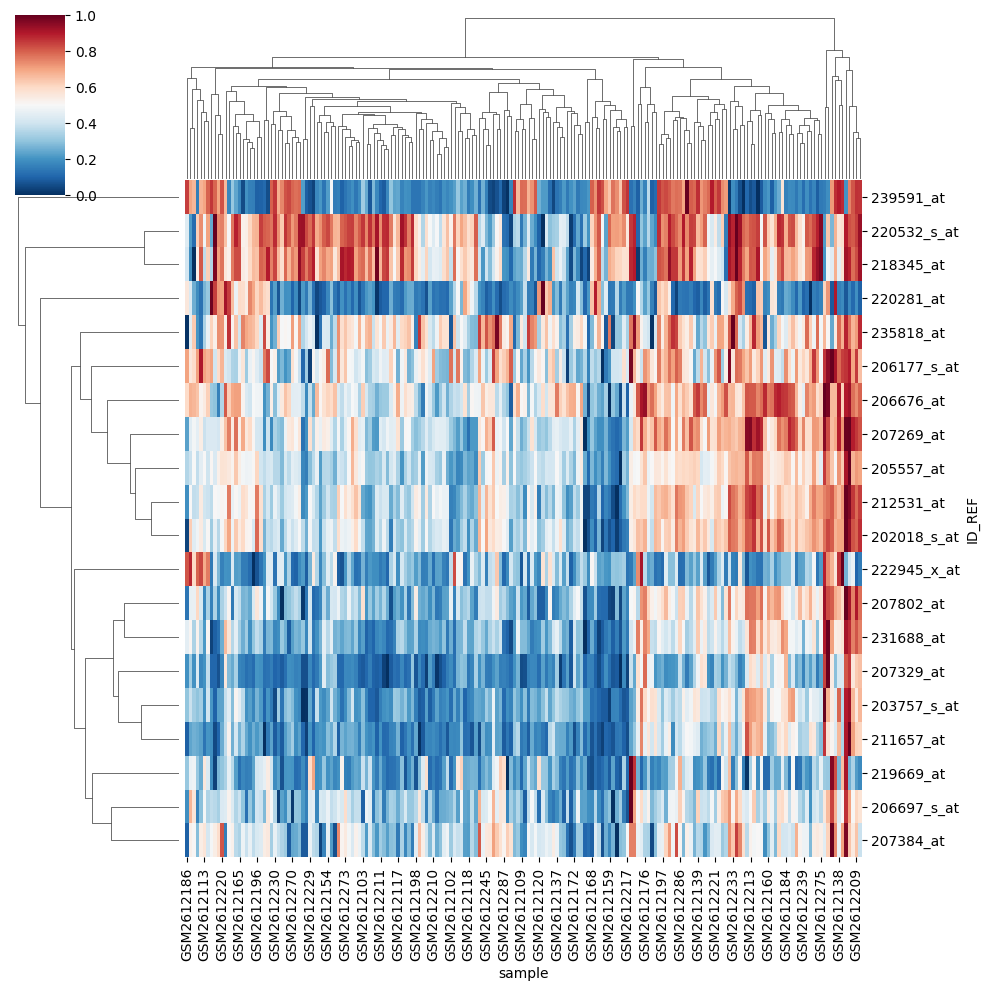

In [ ]:
genes_male = male_fc.head(20).index
heat_male = expr[genes_male]

sns.clustermap(heat_male.T, cmap="RdBu_r", standard_scale=0)
plt.savefig("heatmap_male.png", dpi=300)
plt.show()


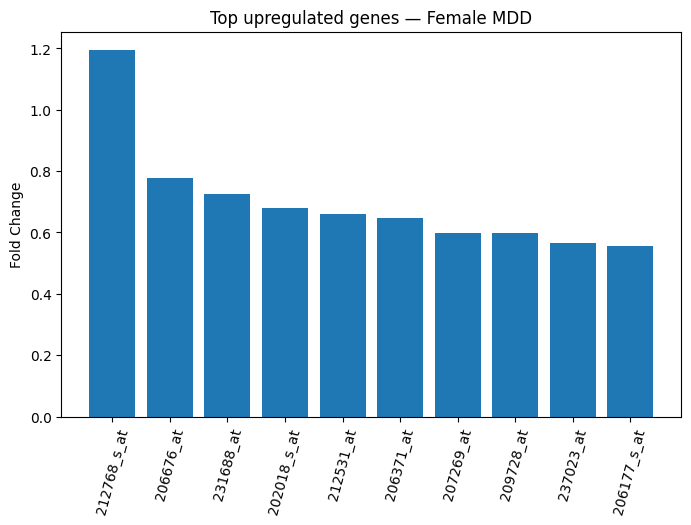

In [ ]:
top10_female = female_fc.head(10)

plt.figure(figsize=(8,5))
plt.bar(top10_female.index, top10_female.values)
plt.xticks(rotation=75)
plt.title("Top upregulated genes — Female MDD")
plt.ylabel("Fold Change")
plt.savefig("bar_female.png", dpi=300)
plt.show()


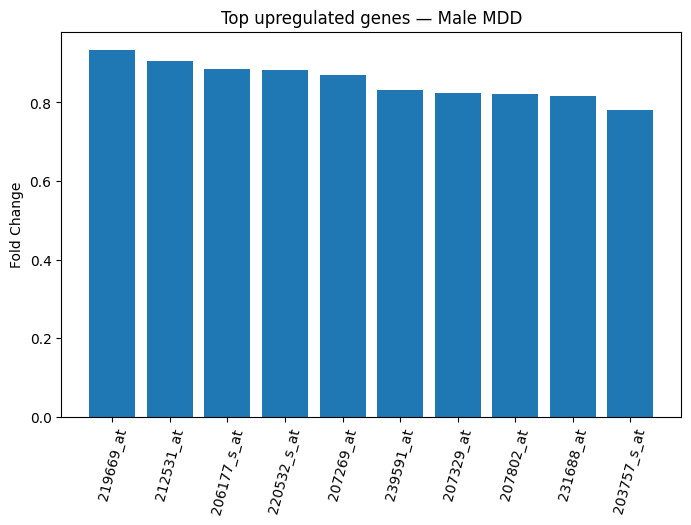

In [ ]:
top10_male = male_fc.head(10)

plt.figure(figsize=(8,5))
plt.bar(top10_male.index, top10_male.values)
plt.xticks(rotation=75)
plt.title("Top upregulated genes — Male MDD")
plt.ylabel("Fold Change")
plt.savefig("bar_male.png", dpi=300)
plt.show()


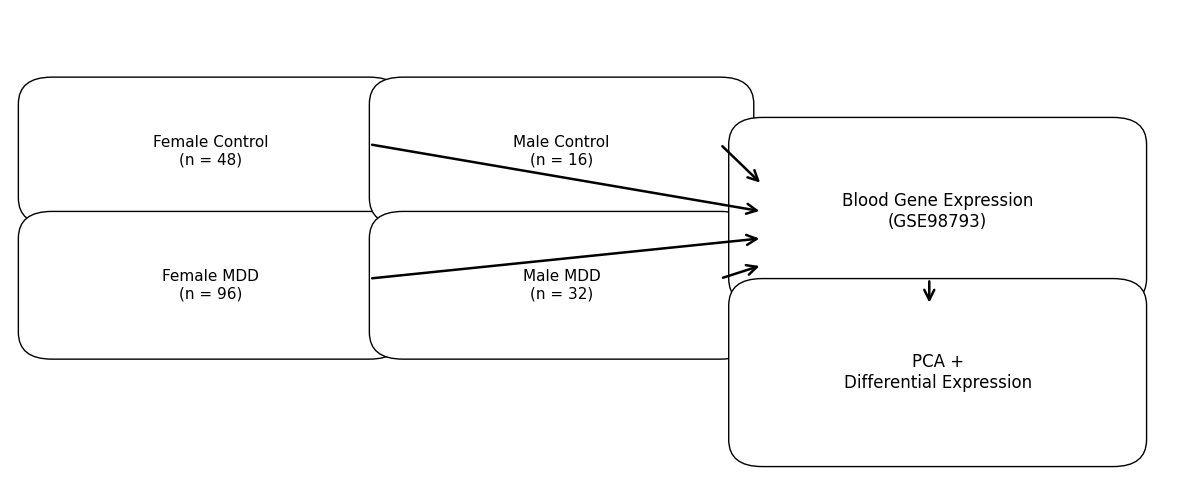

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

# Create figure
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_xlim(0, 14)
ax.set_ylim(0, 7)
ax.axis("off")

def draw_box(x, y, w, h, text, fontsize=11):
    box = FancyBboxPatch((x, y), w, h,
                         boxstyle="round,pad=0.4",
                         edgecolor="black", facecolor="white")
    ax.add_patch(box)
    ax.text(x + w/2, y + h/2, text,
            ha="center", va="center", fontsize=fontsize)

def draw_arrow(x1, y1, x2, y2):
    arrow = FancyArrowPatch((x1, y1), (x2, y2),
                            arrowstyle="->", mutation_scale=18,
                            linewidth=1.8)
    ax.add_patch(arrow)

# Left column: Female groups
draw_box(0.5, 4.2, 3.8, 1.4,
         "Female Control\n(n = 48)")
draw_box(0.5, 2.2, 3.8, 1.4,
         "Female MDD\n(n = 96)")

# Middle-left column: Male groups
draw_box(4.7, 4.2, 3.8, 1.4,
         "Male Control\n(n = 16)")
draw_box(4.7, 2.2, 3.8, 1.4,
         "Male MDD\n(n = 32)")

# Middle box: Data (WIDER + TALLER)
draw_box(9.0, 3.0, 4.2, 2.0,
         "Blood Gene Expression\n(GSE98793)", fontsize=12)

# Right box: Analysis (WIDER + TALLER)
draw_box(9.0, 0.6, 4.2, 2.0,
         "PCA +\nDifferential Expression", fontsize=12)

# Arrows to data box
draw_arrow(4.3, 5.0, 9.0, 4.0)   # Female control
draw_arrow(4.3, 3.0, 9.0, 3.6)   # Female MDD
draw_arrow(8.5, 5.0, 9.0, 4.4)   # Male control
draw_arrow(8.5, 3.0, 9.0, 3.2)   # Male MDD

# Arrow from data box to analysis box
draw_arrow(11.0, 3.0, 11.0, 2.6)

plt.tight_layout()
plt.show()

# Save figure
fig.savefig("study_design_sex_MDD_fixed.png", dpi=300, bbox_inches="tight")


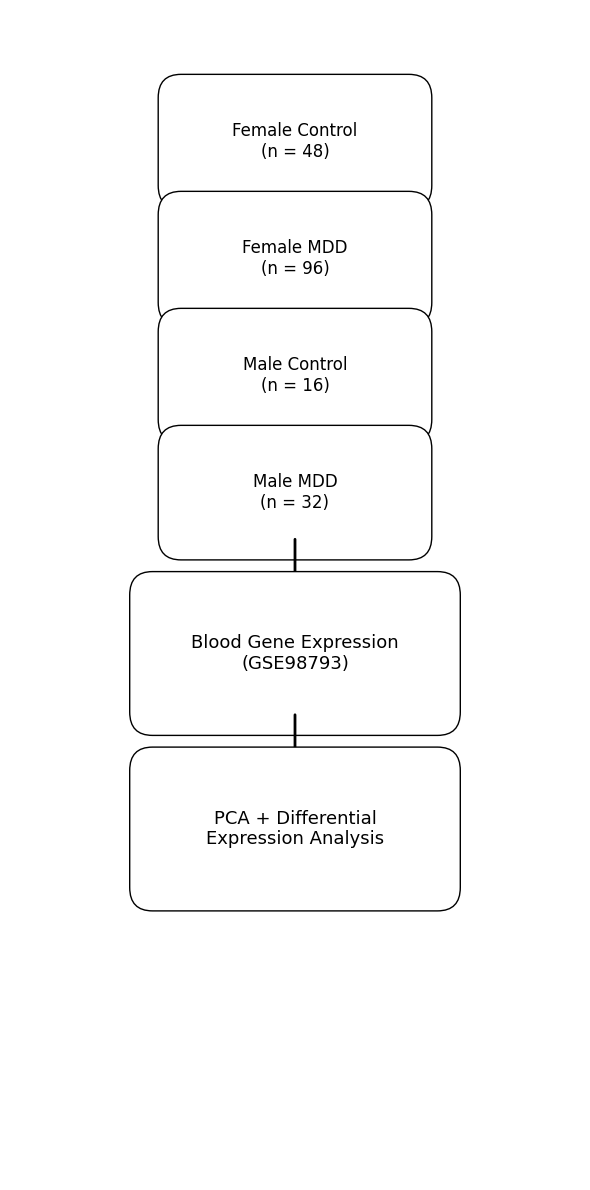

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

# Create vertical figure
fig, ax = plt.subplots(figsize=(6, 12))
ax.set_xlim(0, 10)
ax.set_ylim(0, 20)
ax.axis("off")

def draw_box(x, y, w, h, text, fontsize=12):
    box = FancyBboxPatch((x, y), w, h,
                         boxstyle="round,pad=0.4",
                         edgecolor="black", facecolor="white")
    ax.add_patch(box)
    ax.text(x + w/2, y + h/2, text,
            ha="center", va="center", fontsize=fontsize)

def draw_arrow(x1, y1, x2, y2):
    arrow = FancyArrowPatch((x1, y1), (x2, y2),
                            arrowstyle="->", mutation_scale=20,
                            linewidth=2)
    ax.add_patch(arrow)

# ---- Top section: sex × diagnosis groups ----
draw_box(3, 17, 4, 1.5, "Female Control\n(n = 48)")
draw_box(3, 15, 4, 1.5, "Female MDD\n(n = 96)")
draw_box(3, 13, 4, 1.5, "Male Control\n(n = 16)")
draw_box(3, 11, 4, 1.5, "Male MDD\n(n = 32)")

# Arrow to gene expression box
draw_arrow(5, 11, 5, 10)

# ---- Middle box: dataset ----
draw_box(2.5, 8, 5, 2.0, "Blood Gene Expression\n(GSE98793)", fontsize=13)

# Arrow to analysis
draw_arrow(5, 8, 5, 7)

# ---- Bottom box: analysis ----
draw_box(2.5, 5, 5, 2.0, "PCA + Differential\nExpression Analysis", fontsize=13)

plt.tight_layout()
plt.show()

# Save image
fig.savefig("vertical_study_design_sex_MDD.png", dpi=300, bbox_inches="tight")


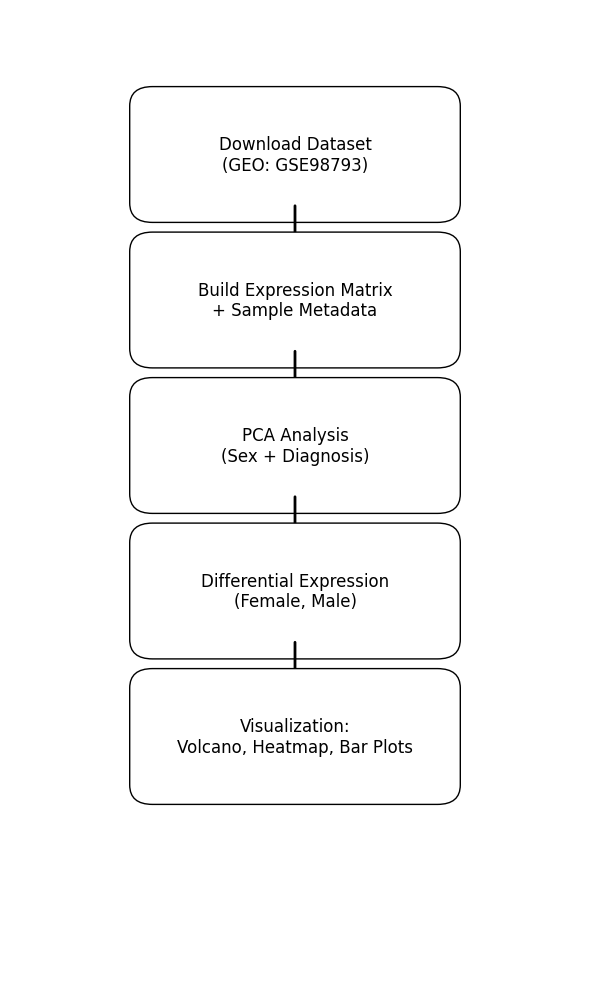

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

fig, ax = plt.subplots(figsize=(6, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 20)
ax.axis("off")

def box(x, y, w, h, text):
    rect = FancyBboxPatch((x, y), w, h,
                          boxstyle="round,pad=0.4",
                          edgecolor="black", facecolor="white")
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, text,
            ha="center", va="center", fontsize=12)

def arrow(x1, y1, x2, y2):
    ax.add_patch(FancyArrowPatch((x1, y1), (x2, y2),
                                 arrowstyle="->", mutation_scale=20, linewidth=2))

# Workflow steps
box(2.5, 16, 5, 2, "Download Dataset\n(GEO: GSE98793)")
arrow(5, 16, 5, 15)

box(2.5, 13, 5, 2, "Build Expression Matrix\n+ Sample Metadata")
arrow(5, 13, 5, 12)

box(2.5, 10, 5, 2, "PCA Analysis\n(Sex + Diagnosis)")
arrow(5, 10, 5, 9)

box(2.5, 7, 5, 2, "Differential Expression\n(Female, Male)")
arrow(5, 7, 5, 6)

box(2.5, 4, 5, 2, "Visualization:\nVolcano, Heatmap, Bar Plots")

plt.tight_layout()
plt.show()

fig.savefig("methods_workflow_diagram.png", dpi=300, bbox_inches="tight")
